In [1]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
%run ../chapter_5/two_layer_net.ipynb
# from two_layer_net import TwoLayerNet

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 12000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = train_size / batch_size

In [3]:
def plot_graph():
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

epoch:     0 | train acc: 0.08263, test acc: 0.08120
epoch:   600 | train acc: 0.90480, test acc: 0.90730
epoch:  1200 | train acc: 0.92450, test acc: 0.92710
epoch:  1800 | train acc: 0.93600, test acc: 0.93310
epoch:  2400 | train acc: 0.94410, test acc: 0.94170
epoch:  3000 | train acc: 0.95270, test acc: 0.95010
epoch:  3600 | train acc: 0.95828, test acc: 0.95390
epoch:  4200 | train acc: 0.96178, test acc: 0.95870
epoch:  4800 | train acc: 0.96470, test acc: 0.95960
epoch:  5400 | train acc: 0.96838, test acc: 0.96390
epoch:  6000 | train acc: 0.97012, test acc: 0.96550
epoch:  6600 | train acc: 0.97290, test acc: 0.96600
epoch:  7200 | train acc: 0.97538, test acc: 0.96710
epoch:  7800 | train acc: 0.97705, test acc: 0.96760
epoch:  8400 | train acc: 0.97803, test acc: 0.96980
epoch:  9000 | train acc: 0.97848, test acc: 0.96720
epoch:  9600 | train acc: 0.98140, test acc: 0.97110
epoch: 10200 | train acc: 0.98147, test acc: 0.97020
epoch: 10800 | train acc: 0.98180, test acc: 0

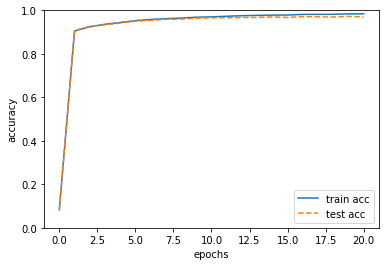

In [4]:
def main():
    for i in range(iters_num + 1):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        grad = network.gradient(x_batch, t_batch)

        for key in ('W1', 'b1', 'W2', 'b2'):
            network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("epoch: {:>5} | train acc: {:.5f}, test acc: {:.5f}".format(i, train_acc, test_acc))

    plot_graph()

if __name__ == '__main__':
    main()